In [1]:
filt_prefix = "filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/"
config_f = "parameters/mttrace/aggregate_qc.yaml"

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import dirname, join
from src.utils.parse_config import read_config_file
import matplotlib as mpl
mpl.use('Agg')
from src.config import ROOT_DIR
from src.utils.data_io import add_id_to_sparse
import os
import numpy as np
%load_ext autoreload
%autoreload 2

Project Directory: /data2/mito_lineage


In [3]:
from src.utils.data_io import load_mtx_df
from mplh.fig_utils import helper_save as hs


from os.path import exists

In [4]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [5]:
os.chdir(ROOT_DIR)

In [6]:
config = read_config_file(config_f)

In [7]:
allConfig = {}
for c in config["configfiles"]:
    allConfig[c] = read_config_file(config["configfiles"][c])



In [8]:
output = f"{config['results']}/10x_out/10x_qcAll.png"
outdir = f"{config['results']}/10x_out/"
output

'output/mttrace/figures/QC/10x_out/10x_qcAll.png'

# (TODO) Total number of fragments after removing low cell count

# Calculate Peaks per cells
And FRIP

In [11]:
allPeaksPerCell = pd.DataFrame()

for c in allConfig:
    curr_in = allConfig[c]["results"]
    mttrace_in = allConfig[c]["mttrace"]
    print(curr_in)
    samples = pd.read_table(allConfig[c]["samples"],sep=',', index_col=0).reset_index().set_index("out_name", drop=False)

    for s, df in samples.iterrows():
        print(c, s)
        peaks = pd.read_csv(join(dirname(samples.loc[s, "barcode_f"]), "peaks.bed"), sep='\t', 
                   header=None)
        cells = pd.read_csv(join(dirname(samples.loc[s, "barcode_f"]), "barcodes.tsv"), header=None)[0]
        cells = cells + "_" + s + "_" + c
        cells.index += 1 #1-based map
        mtx = load_mtx_df(join(dirname(samples.loc[s, "barcode_f"]), "matrix.mtx"), sep=' ', )
        mtx["Sample"] = s
        mtx["exp"] = c        
        mtx = add_id_to_sparse(mtx, cell=cells.to_dict(), cell_col="Cell", cell_name="BC")
        frags_in_peaks_per_cell = mtx.groupby("BC")["Variant"].sum()
        peaks_per_cell = mtx.groupby("BC").apply(lambda x: len(x["Variant"].unique()))
        peaks_per_cell = pd.DataFrame(peaks_per_cell,columns=["Number of peaks"]).pipe(lambda x: x.assign(exp = c,Sample=s))
        peaks_per_cell["Total counts"] = frags_in_peaks_per_cell
        
        allPeaksPerCell = pd.concat((allPeaksPerCell, peaks_per_cell))


output/mttrace/CHIP_april08_2021/MTblacklist
CHIP Control
CHIP Flt3l
CHIP Input
data/processed/mttrace/TcellDupi_may17_2021/MTblacklist
TcellDupi pre
TcellDupi post
data/processed/mttrace/jan21_2021/MTblacklist
cd34Norm Control
cd34Norm Flt3l
output/mttrace/optim_june03_2021/MTblacklist
optim p0_1m5
optim p0_5m5
optim p1_0m5
optim f1_0m10
data/processed/mttrace/DUPI_april08_2021_Croker
pbmcDupi rxn1_pre
pbmcDupi rxn2_pre
pbmcDupi rxn3_post
pbmcDupi rxn4_post
data/processed/mttrace/Lareau_2020/MTblacklist
Lareau CD34_rep1
Lareau PBMC_rep1


# Plot MT
## VMR per cell and coverage

In [14]:
covDir_dict = {"TcellDupi":"data/processed/mttrace/PBMC_may17_2021/MTblacklist"}

## Load the coverage files from multiplex

In [15]:
# #######################
# ## coverage for filtered cells by allele depth, position counts and cell counts
# #######################
# allCoverage = pd.DataFrame()
# allCoverage_d = {}

# for c in allConfig:
#     print(c)
#     for s in allConfig[c]["multiplex"]["samples"]:
#         f_in_data = join(allConfig[c]["results"], "data", s, "MT","cellr_True", f"{s}_200",
#                          filt_prefix, f"{s}.coverage.txt")
#         f_in = join(allConfig[c]["results"], s, filt_prefix, f"{s}.coverage.txt")
#         if "old_results" in allConfig[c]:
#             f_in_old = join(allConfig[c]["old_results"], s, "MT","cellr_True", f"{s}_200", 
#                             filt_prefix, f"{s}.coverage.txt") 
#         else:
#             f_in_old = ""
            
#         if c in covDir_dict:
#             f_in_covDir_dict = join(covDir_dict[c], s, filt_prefix, f"{s}.coverage.txt")
                                     
#         else:
#             f_in_covDir_dict = ""
#         does_exist=False
#         for f in [f_in, f_in_data, f_in_covDir_dict, f_in_old]:
#             if exists(f):
#                 print(f"Reading {f}")
#                 curr_coverage = pd.read_csv(f, header=None)
#                 does_exist=True
#                 # Add info to cell ids in case of duplicates
#                 curr_coverage[1] = curr_coverage[1]+"_"+s+"_"+c
#                 allCoverage_d[(c,s)] = curr_coverage
                
#         if not does_exist:
#             print(f"File for {c}, {s} not here")
#             continue            
                
        
# allCoverage = pd.concat(allCoverage_d).reset_index().rename({0:"Pos", 1:"Cell", 2:"Count", "level_0":"exp", "level_1":"Sample"}, axis=1)
# allCoverage

CHIP
Reading data/processed/mttrace/CHIP_april08_2021/MTblacklist/Control/MT/cellr_True/Control_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/Control.coverage.txt
Reading data/processed/mttrace/CHIP_april08_2021/MTblacklist/Flt3l/MT/cellr_True/Flt3l_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/Flt3l.coverage.txt
Reading output/mttrace/CHIP_april08_2021/MTblacklist/data/Input/MT/cellr_True/Input_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/Input.coverage.txt
Reading data/processed/mttrace/CHIP_april08_2021/MTblacklist/Input/MT/cellr_True/Input_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/Input.coverage.txt
TcellDupi
Reading data/processed/mttrace/TcellDupi_may17_2021/MTblacklist/pre/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/pre.coverage.txt
Reading data/processed/mttrace/TcellDupi_may17_2021/MTblacklist/post/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/post.coverage.txt
cd34Norm
F

,exp,Sample,level_2,Pos,Cell,Count
0,CHIP,Control,0,34,AAACTGCTCTCGCGGA-1_Control_CHIP,995
1,CHIP,Control,1,62,AAACTGCTCTCGCGGA-1_Control_CHIP,1114
2,CHIP,Control,2,68,AAACTGCTCTCGCGGA-1_Control_CHIP,1168
3,CHIP,Control,3,69,AAACTGCTCTCGCGGA-1_Control_CHIP,1179
4,CHIP,Control,4,73,AAACTGCTCTCGCGGA-1_Control_CHIP,1265
...,...,...,...,...,...,...
8980562,pbmcDupi,rxn4,223918,16295,TTTGTGTTCCATGACA-1_rxn4_pbmcDupi,66
8980563,pbmcDupi,rxn4,223919,16319,TTTGTGTTCCATGACA-1_rxn4_pbmcDupi,29
8980564,pbmcDupi,rxn4,223920,16362,TTTGTGTTCCATGACA-1_rxn4_pbmcDupi,49
8980565,pbmcDupi,rxn4,223921,16483,TTTGTGTTCCATGACA-1_rxn4_pbmcDupi,74


In [16]:
cell_mean = allCoverage.groupby(["Cell", "Sample", "exp"])["Count"].mean()
cell_var = allCoverage.groupby(["Cell", "Sample", "exp"])["Count"].var()
cell_vmr = cell_var/cell_mean

In [17]:
cell_sum = allCoverage.groupby(["Cell", "Sample", "exp"])["Count"].sum()

In [18]:
def facet_utils(g, dat, sup_ylabel=None, sup_title=None, title_add_n=True, group_col="ID", ):
    print(dat.head())
    for ax in g.axes.flat:
    # Make x and y-axis labels slightly larger
    #ax.get_yaxis().set_visible(False)
#     ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')
        ax.set_ylabel("")#ax.get_ylabel(), fontsize='x-large')
        # Make title more human-readable and larger
        if ax.get_title():
            new_t = ax.get_title().split('=')[1].strip()
            if title_add_n:
                new_t = f"{new_t}\nn={(dat[group_col]==new_t).sum()}"
            ax.set_title(new_t,
                         fontsize='xx-large')
    if sup_title is not None:
        g.fig.subplots_adjust(top=0.8, left=0.1)
        g.fig.suptitle(sup_title)
    if sup_ylabel is not None:
        g.fig.text(0.04, 0.5, sup_ylabel, va='center', rotation='vertical',
                   size=24)
    return g

                                Cell   Sample        exp      Mean        VMR  \
0  AAACGAAAGAACAGGA-1_post_TcellDupi     post  TcellDupi  5.694631   5.398118   
1   AAACGAAAGACCGCAA-1_f1_0m10_optim  f1_0m10      optim  6.391292  10.360495   
2   AAACGAAAGACTCGGA-1_f1_0m10_optim  f1_0m10      optim  5.310036  10.500125   
3   AAACGAAAGAGCAGCT-1_rxn4_pbmcDupi     rxn4   pbmcDupi  5.761389   7.221412   
4   AAACGAAAGAGCTACG-1_rxn4_pbmcDupi     rxn4   pbmcDupi  5.582394   6.133955   

      MT Sum              ID  
0  13.760720  post_TcellDupi  
1  12.457381   f1_0m10_optim  
2  11.376125   f1_0m10_optim  
3  12.118941   rxn4_pbmcDupi  
4  11.939946   rxn4_pbmcDupi  


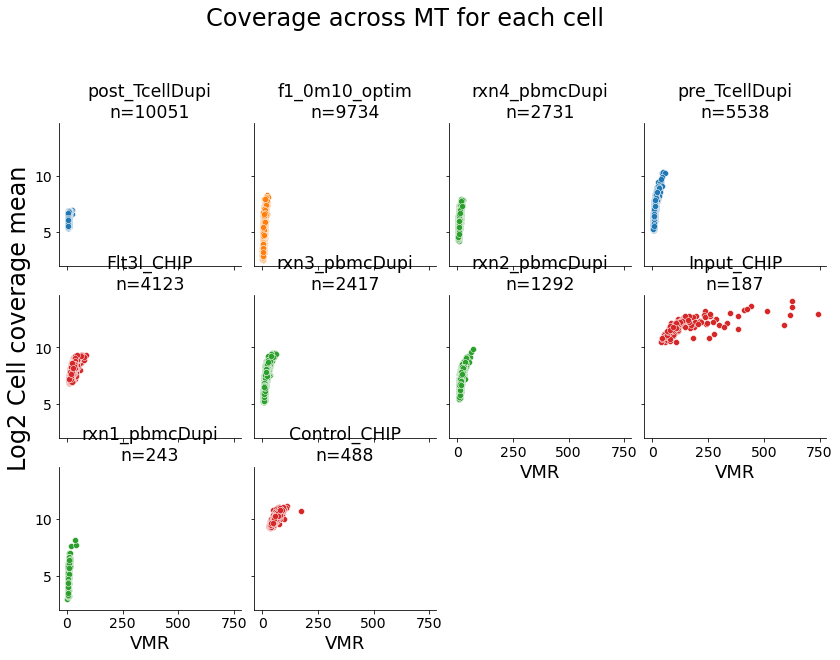

In [19]:
%matplotlib inline
cell_df = pd.concat((np.log2(cell_mean.rename("Mean")), 
                     cell_vmr.rename("VMR"), np.log2(cell_sum.rename("MT Sum"))), axis=1).reset_index()#.rename(, columns=["Mean", 1:"VMR"}, axis=1)
cell_df["ID"] = cell_df["Sample"]+"_"+cell_df["exp"]
#sns.scatterplot(data=cell_df, x="VMR", y="Mean", hue="exp")
g = sns.FacetGrid(data=cell_df,col_wrap=4, col="ID", hue="exp")

g.map_dataframe(sns.scatterplot, x="VMR", y="Mean")
g.set_axis_labels("VMR", "Log2 Cell coverage mean")
g = facet_utils(g, cell_df, sup_ylabel="Log2 Cell coverage mean", 
                sup_title="Coverage across MT for each cell", title_add_n=True)
#g.fig.subplots_adjust(top=0.9)
#g.fig.suptitle("Coverage across MT for each cell")
#cell_df

                                Cell   Sample        exp      Mean       VMR  \
0  AAACGAAAGAACAGGA-1_post_TcellDupi     post  TcellDupi  5.694631  2.432456   
1   AAACGAAAGACCGCAA-1_f1_0m10_optim  f1_0m10      optim  6.391292  3.373021   
2   AAACGAAAGACTCGGA-1_f1_0m10_optim  f1_0m10      optim  5.310036  3.392335   
3   AAACGAAAGAGCAGCT-1_rxn4_pbmcDupi     rxn4   pbmcDupi  5.761389  2.852281   
4   AAACGAAAGAGCTACG-1_rxn4_pbmcDupi     rxn4   pbmcDupi  5.582394  2.616818   

      MT Sum              ID  
0  13.760720  post_TcellDupi  
1  12.457381   f1_0m10_optim  
2  11.376125   f1_0m10_optim  
3  12.118941   rxn4_pbmcDupi  
4  11.939946   rxn4_pbmcDupi  


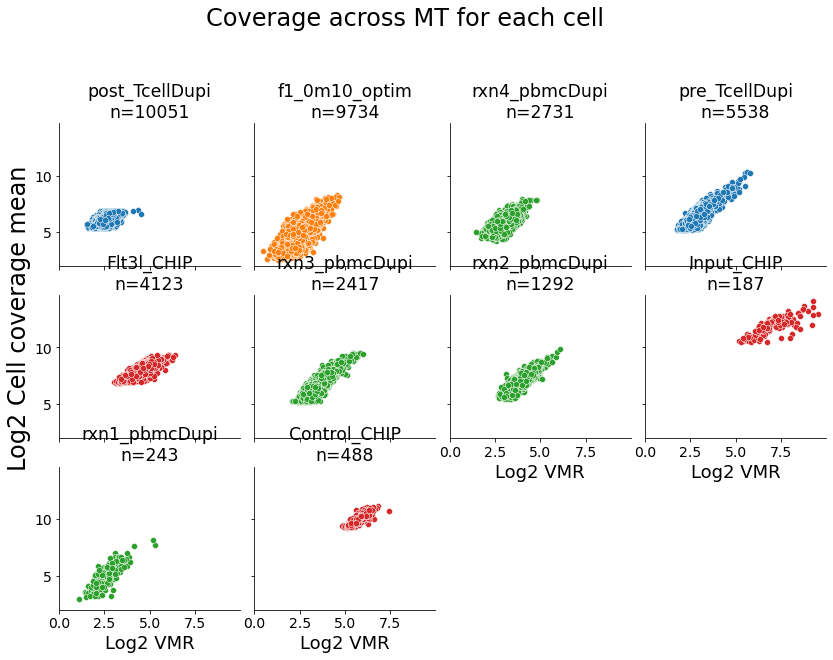

In [27]:
%matplotlib inline
cell_df = pd.concat((np.log2(cell_mean.rename("Mean")), 
                     np.log2(cell_vmr.rename("VMR")),
                     np.log2(cell_sum.rename("MT Sum"))), axis=1).reset_index()#.rename(, columns=["Mean", 1:"VMR"}, axis=1)
cell_df["ID"] = cell_df["Sample"]+"_"+cell_df["exp"]
#sns.scatterplot(data=cell_df, x="VMR", y="Mean", hue="exp")
g = sns.FacetGrid(data=cell_df,col_wrap=4, col="ID", hue="exp")

g.map_dataframe(sns.scatterplot, x="VMR", y="Mean")
g.set_axis_labels("Log2 VMR", "Log2 Cell coverage mean")
g = facet_utils(g, cell_df, sup_ylabel="Log2 Cell coverage mean", 
                sup_title="Coverage across MT for each cell", title_add_n=True)


                                Cell   Sample        exp      Mean       VMR  \
0  AAACGAAAGAACAGGA-1_post_TcellDupi     post  TcellDupi  5.694631  2.432456   
1   AAACGAAAGACCGCAA-1_f1_0m10_optim  f1_0m10      optim  6.391292  3.373021   
2   AAACGAAAGACTCGGA-1_f1_0m10_optim  f1_0m10      optim  5.310036  3.392335   
3   AAACGAAAGAGCAGCT-1_rxn4_pbmcDupi     rxn4   pbmcDupi  5.761389  2.852281   
4   AAACGAAAGAGCTACG-1_rxn4_pbmcDupi     rxn4   pbmcDupi  5.582394  2.616818   

      MT Sum              ID  
0  13.760720  post_TcellDupi  
1  12.457381   f1_0m10_optim  
2  11.376125   f1_0m10_optim  
3  12.118941   rxn4_pbmcDupi  
4  11.939946   rxn4_pbmcDupi  


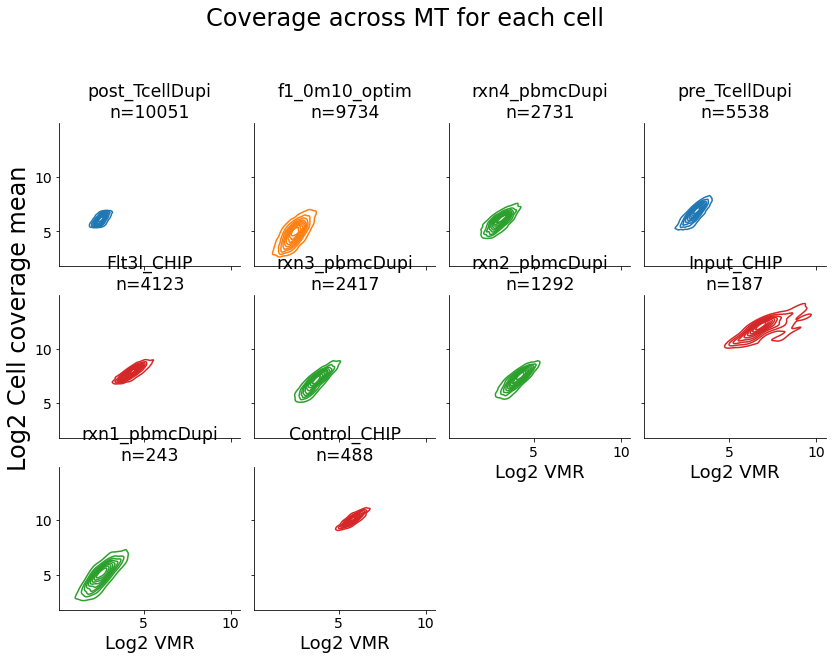

In [28]:
%matplotlib inline
g = sns.FacetGrid(data=cell_df,col_wrap=4, col="ID", hue="exp")

g.map_dataframe(sns.kdeplot, x="VMR", y="Mean")
g.set_axis_labels("Log2 VMR", "Log2 Cell coverage mean")
g = facet_utils(g, cell_df, sup_ylabel="Log2 Cell coverage mean", 
                sup_title="Coverage across MT for each cell", title_add_n=True)


In [29]:
pos_mean = allCoverage.groupby(["Pos", "Sample", "exp"])["Count"].mean()
pos_var = allCoverage.groupby(["Pos", "Sample", "exp"])["Count"].var()
pos_vmr = pos_var/pos_mean

pos_df = pd.concat((np.log2(pos_mean.rename("Mean")), np.log2(pos_vmr.rename("VMR"))), axis=1).reset_index()#.rename(, columns=["Mean", 1:"VMR"}, axis=1)
pos_df["ID"] = pos_df["Sample"]+"_"+pos_df["exp"]



   Pos   Sample        exp       Mean        VMR              ID
0   28    Input       CHIP  11.779983  10.189935      Input_CHIP
1   34  Control       CHIP   9.868317   6.811777    Control_CHIP
2   42    Input       CHIP  12.012436  10.390491      Input_CHIP
3   49    Input       CHIP  12.020139  10.385966      Input_CHIP
4   49     post  TcellDupi   6.119888   3.242476  post_TcellDupi


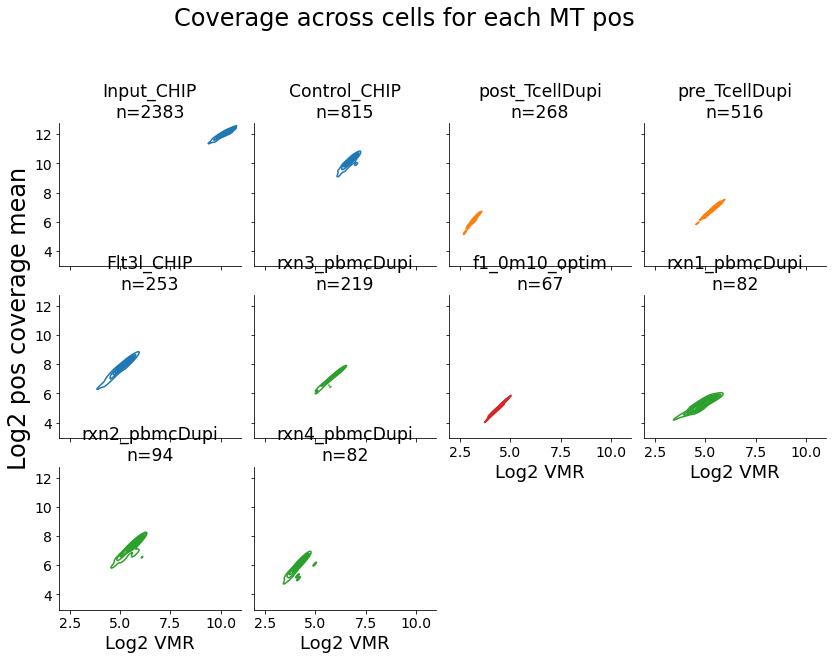

In [30]:
%matplotlib inline
g = sns.FacetGrid(data=pos_df,col_wrap=4, col="ID", hue="exp")

g.map_dataframe(sns.kdeplot, x="VMR", y="Mean")
g.set_axis_labels("Log2 VMR", "Log2 pos coverage mean")
g = facet_utils(g, pos_df, sup_ylabel="Log2 pos coverage mean", 
                sup_title="Coverage across cells for each MT pos", title_add_n=True)


   Pos   Sample        exp       Mean        VMR              ID
0   28    Input       CHIP  11.779983  10.189935      Input_CHIP
1   34  Control       CHIP   9.868317   6.811777    Control_CHIP
2   42    Input       CHIP  12.012436  10.390491      Input_CHIP
3   49    Input       CHIP  12.020139  10.385966      Input_CHIP
4   49     post  TcellDupi   6.119888   3.242476  post_TcellDupi


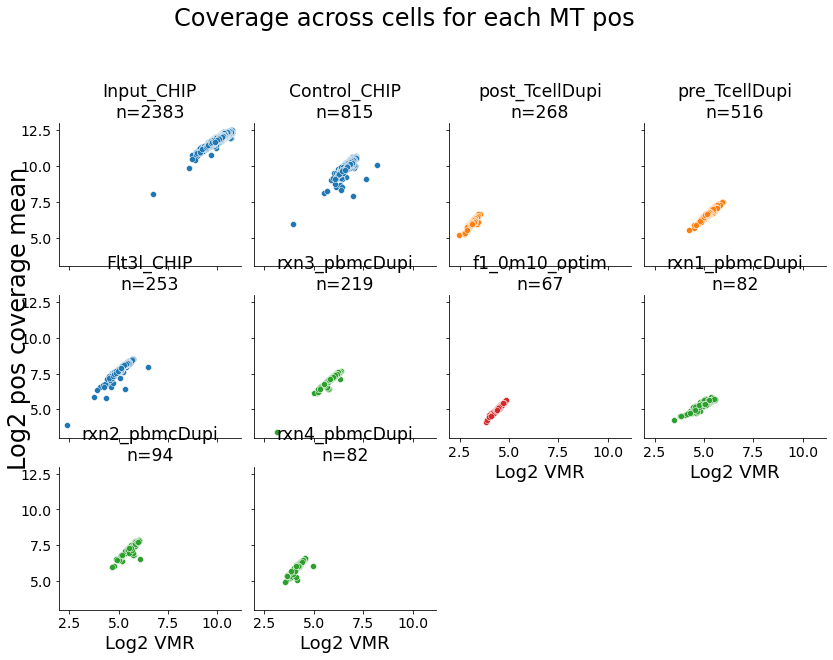

In [31]:
%matplotlib inline
pos_df = pd.concat((np.log2(pos_mean.rename("Mean")), np.log2(pos_vmr.rename("VMR"))), axis=1).reset_index()#.rename(, columns=["Mean", 1:"VMR"}, axis=1)
pos_df["ID"] = pos_df["Sample"]+"_"+pos_df["exp"]
#sns.scatterplot(data=pos_df, x="VMR", y="Mean", hue="exp")
g = sns.FacetGrid(data=pos_df,col_wrap=4, col="ID", hue="exp")

g.map_dataframe(sns.scatterplot, x="VMR", y="Mean")
g.set_axis_labels("Log2 VMR", "Log2 pos coverage mean")
g = facet_utils(g, pos_df, sup_ylabel="Log2 pos coverage mean", 
                sup_title="Coverage across cells for each MT pos", title_add_n=True)
